In [6]:
from pyvis.network import Network
import networkx as nx
import plotly.graph_objects as go
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

In [7]:
n, k, p, q , MinOutsideWeight, MaxOutsideWeight, MinInsideWeight, MaxInsideWeight = input().split()
C = np.zeros(int(k))
M = np.zeros((int(n),int(n)))
color_Map = []

In [8]:
G = nx.Graph()
t = 1
for i in range(int(k)):
    C[i] = int(input())
    a = int(random.random() * 255)
    b = int(random.random() * 255)
    c = int(random.random() * 255)
    rgb = (a, b, c)
    for j in range(int(C[i])):
        G.add_node(t)
        color_Map.append('#' + str('%02x%02x%02x' % rgb))
        t += 1

In [9]:
t = 0
cnt = 0
Graph = []
for i in range(int(n)):
    if(i >= cnt + C[t]):
        cnt += C[t]
        t += 1
    for j in range(i):
        if(j >= cnt):
            x = random.random()
            if(x <= float(p)):
                y = random.random()
                y *= (int(MaxInsideWeight) - int(MinInsideWeight))
                y += int(MinInsideWeight)
                M[i][j] = M[j][i] = y
                temp = [i, j]
                G.add_edge(i + 1, j + 1, weight = y, label = str('%.3f'%y))
        else:
            x = random.random()
            if(x <= float(q)):
                y = random.random()
                y *= (int(MaxOutsideWeight) - int(MinOutsideWeight))
                y += int(MinOutsideWeight)
                M[i][j] = M[j][i] = y
                temp = [i, j]
                G.add_edge(i + 1, j + 1, weight = y, label = str('%.3f'%y))

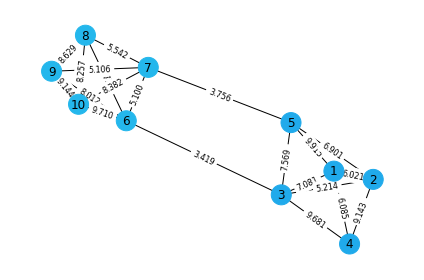

In [10]:
#print(M)
pos = nx.spring_layout(G)
labels = {}
for i in range(int(n)):
    for j in range(int(n)):
        if M[i][j] == 0:
            continue
        labels[(i + 1, j + 1)] = str('%.3f'%M[i][j])
nx.draw_networkx(G,pos , node_color = color_Map, with_labels= True, node_size = 400)
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels, font_size = 8, label_pos = 0.5)
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()
